In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Крок 1: Генерація навчального набору
Ми генеруємо навчальний набір даних за допомогою make_blobs з 500 точок, які належать до двох різних класів.
Використовується параметр cluster_std=1.05, щоб визначити щільність кластерів.

In [59]:
X, y = make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=1.05)

Візуалізація згенерованих даних. Показуємо точки на графіку для наглядної демонстрації, як дані розподілені між двома класами.

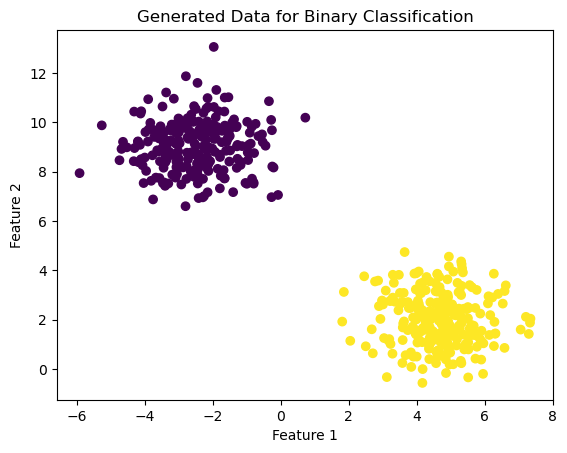

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data for Binary Classification')
plt.show()

Розділяємо дані на навчальну та тестову вибірки (85% і 15% відповідно), щоб оцінити модель після навчання.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Додаємо колонку з одиницями, щоб врахувати вільний член (зміщення) в нашій моделі.

In [63]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

Крок 2: ініціалізуємо ваги випадковими значеннями з інтервалу [-0.5, 0.5] для кожної ознаки (включаючи зміщення).

In [65]:
weights = np.random.uniform(-0.5, 0.5, X_train.shape[1])

Крок 3: Реалізація правила Відроу-Хоффа для навчання персептрону

In [67]:
def train_perceptron(X, y, weights, learning_rate=0.01, epochs=200):
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Розрахунок передбачення
            # Виконуємо скалярний добуток входів та ваг для отримання передбачення
            y_pred = np.dot(X[i], weights) >= 0
            # Обчислення помилки
            error = y[i] - y_pred
            # Оновлення вагових коефіцієнтів
            weights += learning_rate * error * X[i]
    return weights

Крок 4: Навчання персептрону. Використовуємо навчальний набір для тренування персептрону протягом 200 епох.

In [69]:
trained_weights = train_perceptron(X_train, y_train, weights, learning_rate=0.01, epochs=200)

Функція для передбачення класу нових даних на основі тренованих ваг.

In [71]:
def predict(X, weights):
    return (np.dot(X, weights) >= 0).astype(int)

Тестування на тестовому наборі та оцінка точність моделі.

In [73]:
y_pred = predict(X_test, trained_weights)

Порівняння результатів тестування з цільовими даними

In [75]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 100.00%


Візуалізація розділення тестування на площині: фактичні значення та передбачення для тестових даних.

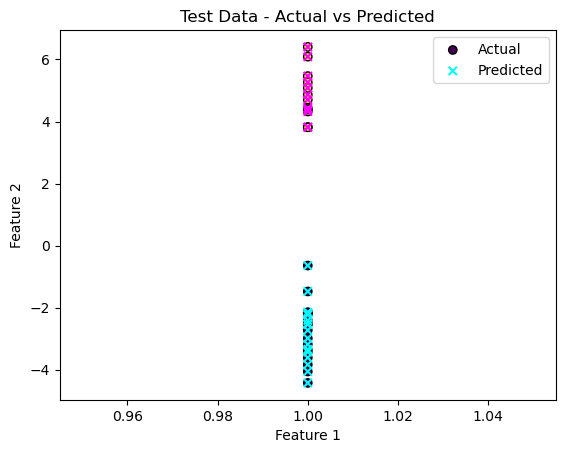

In [77]:
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis', marker='o', edgecolor='k', label='Actual')
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred, cmap='cool', marker='x', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data - Actual vs Predicted')
plt.legend()
plt.show()